# Importando las dependencias

In [1]:
# NumPy para operaciones numéricas
import numpy as np  

# Pandas para el manejo de datos tabulares
import pandas as pd  

# Para escalar los datos
from sklearn.preprocessing import StandardScaler  

# Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split  

# Importar el algoritmo SVM (Support Vector Machine)
from sklearn import svm  

# Para evaluar la precisión del modelo
from sklearn.metrics import accuracy_score  

# Para modelos de clasificación adicionales
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Para generar informes de clasificación y matrices de confusión
from sklearn.metrics import classification_report, confusion_matrix

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


## Explicación de los datos

- **Pregnancies:** Número de embarazos.
- **Glucose:** Concentración de glucosa en la sangre.
- **BloodPressure:** Presión arterial.
- **SkinThickness:** Grosor de la piel.
- **Insulin:** Nivel de insulina en la sangre.
- **BMI:** Índice de masa corporal (Body Mass Index).
- **DiabetesPedigreeFunction:** Función de pedigrí de diabetes, que evalúa la probabilidad de diabetes en función de la historia familiar.
- **Age:** Edad de la persona.
- **Outcome:** Resultado o etiqueta, donde 1 indica la presencia de diabetes y 0 indica la ausencia de diabetes.



# Recolección y análisis de datos

## Conjunto de datos de diabetes

In [2]:
# Cargando el conjunto de datos de diabetes en un DataFrame de pandas
diabetes_dataset = pd.read_csv('./diabetes.csv')

In [3]:
# Imprimiendo las primeras 5 filas del conjunto de datos
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Número de filas y columnas en este conjunto de datos
diabetes_dataset.shape

(768, 9)

In [5]:
# Obteniendo las medidas estadísticas de los datos
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- **Outcome:** Etiqueta del resultado, donde:
  - 0: No diabético (Non-Diabetic)
  - 1: Diabético (Diabetic)


In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# Separando los datos y las etiquetas
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Estandarización de datos

## ¿Porque es importante?

Estandarización de datos se refiere al proceso de ajustar o transformar las características de un conjunto de datos para que tengan una media (promedio) de cero y una desviación estándar de uno. Esto es útil para que las características tengan una escala uniforme, lo que puede ser importante en algoritmos de aprendizaje automático que son sensibles a las diferencias de escala entre las características.

In [11]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de características
scaler.fit(X)

# Aplicando la transformación de estandarización a los datos de características
standardized_data = scaler.transform(X)


Este código utiliza StandardScaler de scikit-learn para estandarizar las características en la matriz X. Después de este proceso, las características en X tendrán una media de cero y una desviación estándar de uno. Esto es útil para garantizar que todas las características tengan una escala similar y puedan ser utilizadas de manera efectiva en algoritmos de aprendizaje automático.

In [12]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
# Asignando los datos estandarizados a la variable X para su uso en el modelo
X = standardized_data

# Asignando las etiquetas de resultado al conjunto de datos Y
Y = diabetes_dataset['Outcome']


In [14]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [15]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
# X_train: Conjunto de características de entrenamiento
# X_test: Conjunto de características de prueba
# Y_train: Etiquetas de resultado de entrenamiento
# Y_test: Etiquetas de resultado de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Entrenando el modelo

## Maquinas de soporte vectorial

In [17]:
# Creación de un clasificador de Máquinas de Soporte Vectorial (SVM) con un núcleo lineal
classifier = svm.SVC(kernel='linear')
# Entrenamiento del clasificador de Máquinas de Soporte Vectorial (SVM)
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Regresión Logística

In [18]:
# Crear un clasificador de Regresión Logística
logistic_classifier = LogisticRegression()

# Entrenar el clasificador
logistic_classifier.fit(X_train, Y_train)


LogisticRegression()

## Random Forest

In [19]:
# Crear un clasificador de Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

# Entrenar el clasificador
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

## K-Nearest Neighbors (KNN)

In [20]:
# Crear un clasificador de K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

## Naive Bayes

In [21]:
# Crear un clasificador de Naive Bayes
naive_bayes_classifier = GaussianNB()

# Entrenar el clasificador
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

# Evaluando los modelos

## Puntaje de precisión en los datos de entrenamiento y prueba del modelo SVM

In [22]:
# Puntaje de precisión en los datos de entrenamiento del modelo SVM
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Imprimir el puntaje de precisión de los datos de entrenamiento en la consola
print('Puntaje de precisión de los datos de entrenamiento del modelo SVM: ', training_data_accuracy)

# Puntaje de precisión en los datos de prueba
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Imprimir el puntaje de precisión de los datos de prueba en la consola
print('Puntaje de precisión de los datos de prueba del modelo SVM: ', test_data_accuracy)

Puntaje de precisión de los datos de entrenamiento del modelo SVM:  0.7866449511400652
Puntaje de precisión de los datos de prueba del modelo SVM:  0.7727272727272727


## Puntaje de precisión en los datos de entrenamiento y prueba del modelo de Regresión Logística

In [23]:

# Puntaje de precisión en los datos de entrenamiento del modelo de Regresión Logística
X_train_prediction_logistic = logistic_classifier.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction_logistic, Y_train)

# Imprimir el puntaje de precisión de los datos de entrenamiento en la consola
print('Puntaje de precisión de los datos de entrenamiento del modelo de Regresión Logística: ', training_data_accuracy_logistic)

# Puntaje de precisión en los datos de prueba del modelo de Regresión Logística
X_test_prediction_logistic = logistic_classifier.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction_logistic, Y_test)

# Imprimir el puntaje de precisión de los datos de prueba en la consola
print('Puntaje de precisión de los datos de prueba del modelo de Regresión Logística: ', test_data_accuracy_logistic)


Puntaje de precisión de los datos de entrenamiento del modelo de Regresión Logística:  0.7850162866449512
Puntaje de precisión de los datos de prueba del modelo de Regresión Logística:  0.7597402597402597


## Puntaje de precisión en los datos de entrenamiento y prueba del modelo de Random Forest

In [24]:
# Puntaje de precisión en los datos de entrenamiento del modelo de Random Forest
X_train_prediction_rf = random_forest_classifier.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)

# Imprimir el puntaje de precisión de los datos de entrenamiento en la consola
print('Puntaje de precisión de los datos de entrenamiento del modelo de Random Forest: ', training_data_accuracy_rf)

# Puntaje de precisión en los datos de prueba del modelo de Random Forest
X_test_prediction_rf = random_forest_classifier.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

# Imprimir el puntaje de precisión de los datos de prueba en la consola
print('Puntaje de precisión de los datos de prueba del modelo de Random Forest: ', test_data_accuracy_rf)


Puntaje de precisión de los datos de entrenamiento del modelo de Random Forest:  1.0
Puntaje de precisión de los datos de prueba del modelo de Random Forest:  0.7272727272727273


## Puntaje de precisión en los datos de entrenamiento y prueba del modelo de K-Nearest Neighbors (KNN)

In [25]:
# Puntaje de precisión en los datos de entrenamiento del modelo de K-Nearest Neighbors (KNN)
X_train_prediction_knn = knn_classifier.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

# Imprimir el puntaje de precisión de los datos de entrenamiento en la consola
print('Puntaje de precisión de los datos de entrenamiento del modelo de K-Nearest Neighbors (KNN): ', training_data_accuracy_knn)

# Puntaje de precisión en los datos de prueba del modelo de K-Nearest Neighbors (KNN)
X_test_prediction_knn = knn_classifier.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

# Imprimir el puntaje de precisión de los datos de prueba en la consola
print('Puntaje de precisión de los datos de prueba del modelo de K-Nearest Neighbors (KNN): ', test_data_accuracy_knn)


Puntaje de precisión de los datos de entrenamiento del modelo de K-Nearest Neighbors (KNN):  0.8289902280130294
Puntaje de precisión de los datos de prueba del modelo de K-Nearest Neighbors (KNN):  0.7207792207792207


## Puntaje de precisión en los datos de entrenamiento y prueba del modelo de Naive Bayes

In [26]:
# Puntaje de precisión en los datos de entrenamiento del modelo de Naive Bayes
X_train_prediction_nb = naive_bayes_classifier.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, Y_train)

# Imprimir el puntaje de precisión de los datos de entrenamiento en la consola
print('Puntaje de precisión de los datos de entrenamiento del modelo de Naive Bayes: ', training_data_accuracy_nb)

# Puntaje de precisión en los datos de prueba del modelo de Naive Bayes
X_test_prediction_nb = naive_bayes_classifier.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, Y_test)

# Imprimir el puntaje de precisión de los datos de prueba en la consola
print('Puntaje de precisión de los datos de prueba del modelo de Naive Bayes: ', test_data_accuracy_nb)


Puntaje de precisión de los datos de entrenamiento del modelo de Naive Bayes:  0.755700325732899
Puntaje de precisión de los datos de prueba del modelo de Naive Bayes:  0.7727272727272727


In [27]:
# Función para imprimir estadísticas de un modelo
def print_model_stats(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    print("\n")

# SVM
print_model_stats("SVM", Y_test, X_test_prediction)

# Regresión Logística
print_model_stats("Regresión Logística", Y_test, X_test_prediction_logistic)

# Random Forest
print_model_stats("Random Forest", Y_test, X_test_prediction_rf)

# K-Nearest Neighbors (KNN)
print_model_stats("KNN", Y_test, X_test_prediction_knn)

# Naive Bayes
print_model_stats("Naive Bayes", Y_test, X_test_prediction_nb)

--- SVM ---
Matriz de Confusión:
[[91  9]
 [26 28]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



--- Regresión Logística ---
Matriz de Confusión:
[[89 11]
 [26 28]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



--- Random Forest ---
Matriz de Confusión:
[[86 14]
 [28 26]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75 

## Métricas Comunes:
### Precision: La precisión indica la proporción de instancias clasificadas como positivas que son realmente positivas. Un valor más alto de precisión indica que el modelo tiene menos falsos positivos.

### Recall (Sensibilidad): El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Un valor más alto de recall indica que el modelo tiene menos falsos negativos.

### F1-score: Es la media armónica de precisión y recall. Proporciona un equilibrio entre precisión y recall.

## Matriz de Confusión:
###  Verdaderos Positivos (TP): Número de instancias positivas correctamente clasificadas como positivas.

### Verdaderos Negativos (TN): Número de instancias negativas correctamente clasificadas como negativas.

### Falsos Positivos (FP): Número de instancias negativas incorrectamente clasificadas como positivas.

### Falsos Negativos (FN): Número de instancias positivas incorrectamente clasificadas como negativas.

## SVM (Máquinas de Soporte Vectorial):
- La precisión del modelo SVM es del 76%, lo que significa que el 76% de las instancias clasificadas como positivas son realmente positivas.
- El recall es del 52%, indicando que el modelo identifica correctamente el 52% de todas las instancias realmente positivas.
- El F1-score es del 62%, lo que representa un equilibrio entre precisión y recall.
- La matriz de confusión muestra que el modelo tiene 91 verdaderos positivos, 28 falsos positivos, 9 falsos negativos y 26 verdaderos negativos.

## Regresión Logística:
- La precisión de la Regresión Logística es del 72%, sugiriendo que el 72% de las instancias clasificadas como positivas son realmente positivas.
- El recall es del 52%, indicando que el modelo identifica correctamente el 52% de todas las instancias realmente positivas.
- El F1-score es del 60%, equilibrando precisión y recall.
- La matriz de confusión muestra 89 verdaderos positivos, 11 falsos positivos, 26 falsos negativos y 28 verdaderos negativos.

## Random Forest:
- La precisión del modelo Random Forest es del 65%, indicando que el 65% de las instancias clasificadas como positivas son realmente positivas.
- El recall es del 48%, sugiriendo que el modelo identifica correctamente el 48% de todas las instancias realmente positivas.
- El F1-score es del 55%, proporcionando un equilibrio entre precisión y recall.
- La matriz de confusión muestra 86 verdaderos positivos, 14 falsos positivos, 28 falsos negativos y 26 verdaderos negativos.

## K-Nearest Neighbors (KNN):
- La precisión del modelo KNN es del 65%, indicando que el 65% de las instancias clasificadas como positivas son realmente positivas.
- El recall es del 44%, sugiriendo que el modelo identifica correctamente el 44% de todas las instancias realmente positivas.
- El F1-score es del 53%, ofreciendo un equilibrio entre precisión y recall.
- La matriz de confusión muestra 87 verdaderos positivos, 13 falsos positivos, 30 falsos negativos y 24 verdaderos negativos.

## Naive Bayes:
- La precisión del modelo Naive Bayes es del 72%, indicando que el 72% de las instancias clasificadas como positivas son realmente positivas.
- El recall es del 57%, sugiriendo que el modelo identifica correctamente el 57% de todas las instancias realmente positivas.
- El F1-score es del 64%, proporcionando un equilibrio entre precisión y recall.
- La matriz de confusión muestra 88 verdaderos positivos, 12 falsos positivos, 23 falsos negativos y 31 verdaderos negativos.
 
Despues de evaluar los 5 modelos, podemos saltar a estas conclusiones:

- El modelo SVM tiene un rendimiento sólido, con una precisión del 76% y un buen equilibrio entre precisión y recall (F1-score del 62%).
- Naive Bayes también muestra un rendimiento competitivo, con una precisión del 72%, un recall del 57%, y un F1-score del 64%.

Por consiguiente, se selecciono como mejor modelo al modelo SVM, con el cual se hara el sistema predictivo.

# Creando un Sistema Predictivo

In [28]:
# Contando el total de personas en el conjunto de datos
total_personas_csv = len(diabetes_dataset)

# Seleccionando todas las instancias del conjunto de datos
all_data = diabetes_dataset.iloc[:, :-1].values

# Estandarizando los datos utilizando el mismo escalador que antes
std_data_all = scaler.transform(all_data)

# Realizando las predicciones para todo el conjunto de datos
predictions_all = classifier.predict(std_data_all)

# Contando el número de personas con y sin diabetes
personas_con_diabetes = np.count_nonzero(predictions_all)
personas_sin_diabetes = total_personas_csv - personas_con_diabetes

# Mostrando los resultados
print("Total de personas en el CSV:", total_personas_csv)
print("Total de personas con diabetes:", personas_con_diabetes)
print("Total de personas sin diabetes:", personas_sin_diabetes)

Total de personas en el CSV: 768
Total de personas con diabetes: 206
Total de personas sin diabetes: 562


c:\Users\Juan Hurtado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Gráfico de barras, para una interpretación mas sencilla

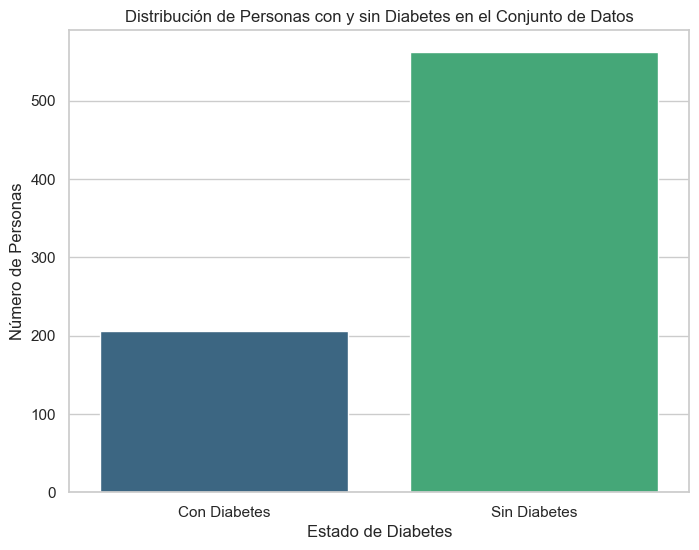

In [29]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Datos
labels = ['Con Diabetes', 'Sin Diabetes']
data_counts = [personas_con_diabetes, personas_sin_diabetes]

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=data_counts, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Estado de Diabetes')
plt.ylabel('Número de Personas')
plt.title('Distribución de Personas con y sin Diabetes en el Conjunto de Datos')

# Mostrar el gráfico
plt.show()




# Recomendaciones continuidad proyecto:
- Explorar técnicas avanzadas como ajuste de hiperparámetros y validación cruzada para mejorar el rendimiento de los modelos.
- Evaluar otras métricas y realizar análisis más detallados para obtener una comprensión completa del rendimiento del modelo.